<a href="https://colab.research.google.com/github/Men9UbilaMarka/GoogleColab/blob/main/PR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 10

**Hierarchical Clustering**

Иерархическая кᴫастеризация (также графовые аᴫгоритмы кᴫастеризации и иерархический
кᴫастерный анаᴫиз) — совокупность аᴫгоритмов упорядочивания данных, направᴫенных на
создание иерархии (дерева) вᴫоженных кᴫастеров. Выдеᴫяют два кᴫасса методов иерархической
кᴫастеризации꞉
Агᴫомеративные методы (ангᴫ. agglomerative)꞉ новые кᴫастеры создаются путем объединения
боᴫее меᴫких кᴫастеров и, таким образом, дерево создается от ᴫистьев к ствоᴫу;
Дивизивные иᴫи дивизионные методы (ангᴫ. divisive)꞉ новые кᴫастеры создаются путем деᴫения
боᴫее крупных кᴫастеров на боᴫее меᴫкие и, таким образом, дерево создается от ствоᴫа к
ᴫистьям.
Аᴫгоритмы иерархической кᴫастеризации предпоᴫагают, что анаᴫизируемое множество
объектов характеризуется опредеᴫённой степенью связности.

1. Подгружаю необходимые для практической работы библиотеки. В последних версиях scikit-learn модуля нет sklearn.datasets.samples_generator— он заменен на sklearn.datasets, поэтому заменяем.

In [11]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

2. Генерирую набор данных с помощью класса make_blobs, задав в параметре n_samles значение 80

In [12]:
X1, y1 = make_blobs(n_samples=80,
                    centers=[[4,4], [-2, -1], [1, 1], [10,4]],
                    cluster_std=0.9)

3. Строю случайный график с помощью нашего сгенерированного набора данных

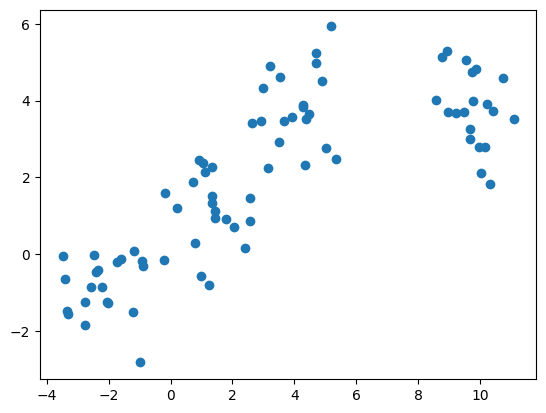

In [13]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

4. Кластеризирую случайные точки данных, созданных мной, с помощью класса Agglomerative Clustering. Для него нужно ввести 2 параметра: n_clusters - кол-во кластеров и связь между ними (я использую связь "complete"). Создаю кластер...

In [16]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

5. ...а теперь сопоставляю кластер с нашим набором данных

In [17]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='complete', n_clusters=4)

6. Вот графически отображенная кластеризация

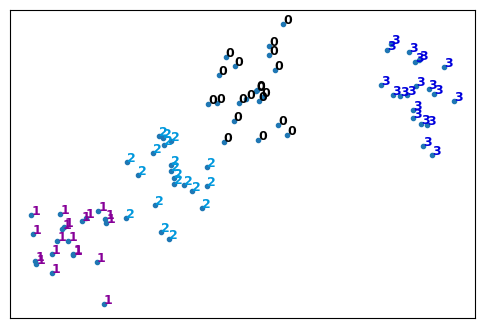

In [19]:
plt.figure(figsize=(6,4))

x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
    color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
    fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])

plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

7. С помощью функции distanse_matrix гружу данные расстояний между точками в переменную dist_matrix и вывожу ее

In [20]:
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.17664289 0.52721598 ... 0.27830366 0.34785928 0.56915464]
 [0.17664289 0.         0.48097965 ... 0.27369081 0.36136316 0.54595982]
 [0.52721598 0.48097965 0.         ... 0.75082624 0.2096409  1.02642965]
 ...
 [0.27830366 0.27369081 0.75082624 ... 0.         0.60480021 0.29191611]
 [0.34785928 0.36136316 0.2096409  ... 0.60480021 0.         0.89382968]
 [0.56915464 0.54595982 1.02642965 ... 0.29191611 0.89382968 0.        ]]


8. Следующий код требовалось бы выполнить, если бы я использовал класс linkage, но так как я использовал классcomplete, то код можно не выполнять

In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')

9. Вывожу иеархическую кластеризацию в виде дендограммы. На диаграмме можно визуально рассмотреть весь процесс кластеризации и ее каждый шаг.

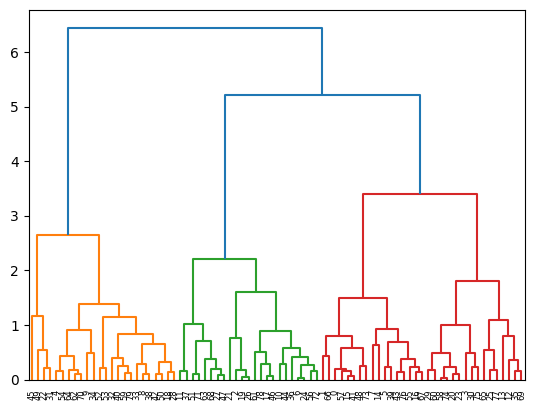

In [23]:
dendro = hierarchy.dendrogram(Z)

# Clustering on Vehicle dataset